In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report


In [9]:
df =pd.read_csv("dataset.csv")


In [44]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [50]:
# We use LabelEncoder from Ski Learn to convert collums that are objects- type in numerical values 
le = LabelEncoder()
for column in df.columns:
    # Check if the column's data type is 'object' (indicating it's a categorical variable)
    if df[column].dtype == 'object':
        # Apply the LabelEncoder to the column, converting it to numerical values
        df[column] = le.fit_transform(df[column])
        


# We separate the churn collum (our target variable) from the rest 
X = df.drop('Churn', axis=1)  # Features 
y = df['Churn']  # Target variable 

# Then, we split the data into training and testing sets

# 80% of the data will be used for training, and 20% will be used for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize a StandardScaler instance for feature scaling
#This preventes features with larger variances from dominating the model's learning process.

scaler = StandardScaler()

# Fit the scaler to the training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Setting up the logistic regression 

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train) # We train the logistic regression model using the training data
y_pred = log_reg.predict(X_test)# We make predictions on the test data

# Evalution the accuracy of the model 

accuracy = accuracy_score(y_test, y_pred)# Calculate the accuracy score
print(f"Accuracy: {accuracy}")
conf_matrix = confusion_matrix(y_test, y_pred)# Generate the confusion matrix
print(f"Confusion Matrix:\n{conf_matrix}")
classification_rep = classification_report(y_test, y_pred)# Generate the classification report
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.8147622427253371
Confusion Matrix:
[[940  96]
 [165 208]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [22]:
######################################################

In [23]:
#Balancing the Dataset with SMOTE

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8285024154589372
Confusion Matrix:
[[804 217]
 [138 911]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1021
           1       0.81      0.87      0.84      1049

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



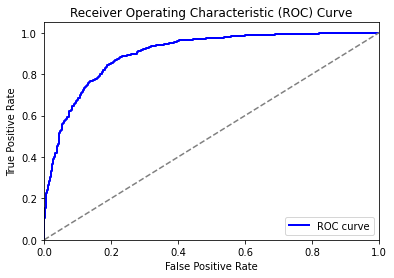

In [52]:

# Balance the dataset using SMOTE (Synthetic Minority Over-sampling Technique)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)  # Resample the data to balance classes

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Standardize the feature variables using StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid for hyperparameter tuning
# It contains hyperparameters and their corresponding values that 
# will be tested during hyperparameter tuning.
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter values
    'penalty': ['l1', 'l2'],  # Penalty norm options (L1 or L2)
    'solver': ['liblinear']  # Optimization algorithm for logistic regression
}

# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=10000)#we pick a high enough max_inter 
                                            #so that it has time to converge

    
# We use GridSearchCV to find the best parameters for the regression
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# We find the best model and parameters
best_log_reg = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train the best model on the entire training set
best_log_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = best_log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Plot ROC curve
y_pred_prob = best_log_reg.predict_proba(X_test)[:, 1]  # Predict probabilities for class 1 (churn)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)  # Compute ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')  # Plot ROC curve
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Plot diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()  # Show plot


In [25]:
#GRADIENT DECENT

Cost at iteration 0: 0.6912448214735116
Cost at iteration 100: 0.5777035652300003
Cost at iteration 200: 0.5288734450985847
Cost at iteration 300: 0.5009906530290689
Cost at iteration 400: 0.4828831299728904
Cost at iteration 500: 0.4703010883198204
Cost at iteration 600: 0.46117830190028886
Cost at iteration 700: 0.4543575684143549
Cost at iteration 800: 0.44913304952814914
Cost at iteration 900: 0.4450496454666454
Cost at iteration 1000: 0.4418022000576004
Cost at iteration 1100: 0.43917989972546634
Cost at iteration 1200: 0.4370335394237453
Cost at iteration 1300: 0.4352553271296262
Cost at iteration 1400: 0.43376597707738
Cost at iteration 1500: 0.43250622777554015
Cost at iteration 1600: 0.43143113737713307
Cost at iteration 1700: 0.43050616973769024
Cost at iteration 1800: 0.42970446124396555
Cost at iteration 1900: 0.4290048815553887
Cost at iteration 2000: 0.42839063748780304
Cost at iteration 2100: 0.42784825437048823
Cost at iteration 2200: 0.42736682355509575
Cost at iterati

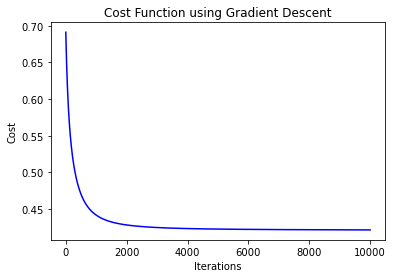

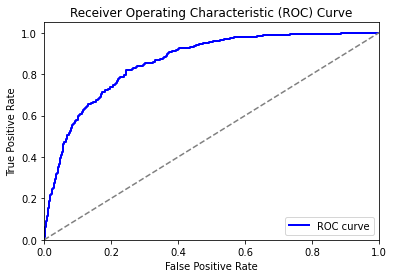

In [26]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, weights, bias):
    m = len(y)
    Z = np.dot(X, weights) + bias
    A = sigmoid(Z)
    cost = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    return cost

# Gradient descent
def gradient_descent(X, y, weights, bias, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        Z = np.dot(X, weights) + bias
        A = sigmoid(Z)
        
        dw = 1/m * np.dot(X.T, (A - y))
        db = 1/m * np.sum(A - y)
        
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        cost = compute_cost(X, y, weights, bias)
        cost_history.append(cost)
        
        if i % 100 == 0:
            print(f"Cost at iteration {i}: {cost}")

    return weights, bias, cost_history

# Prediction
def predict(X, weights, bias):
    Z = np.dot(X, weights) + bias
    A = sigmoid(Z)
    return np.where(A >= 0.5, 1, 0)

# Assuming 'df' is your DataFrame
# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Define feature variables (X) and target variable (y)
X = df.drop('Churn', axis=1).values
y = df['Churn'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize parameters
n_features = X_train.shape[1]
weights = np.zeros(n_features)
bias = 0
learning_rate = 0.01
iterations = 10000

# Train the model using gradient descent
weights, bias, cost_history = gradient_descent(X_train, y_train, weights, bias, learning_rate, iterations)

# Make predictions
y_pred = predict(X_test, weights, bias)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

# Plot the cost function
plt.plot(range(iterations), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function using Gradient Descent')
plt.show()

# Plot ROC curve
y_pred_prob = sigmoid(np.dot(X_test, weights) + bias)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [28]:
df =pd.read_csv("dataset.csv")


# Encode categorical variables
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

# Define feature variables (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables for models that benefit from scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)
print(classification_report(y_test, y_pred_log_reg))

# Train and evaluate Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", accuracy_tree)
print(classification_report(y_test, y_pred_tree))

# Train and evaluate Random Forest
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("Random Forest Accuracy:", accuracy_forest)
print(classification_report(y_test, y_pred_forest))

# Feature Importance from Random Forest
feature_importances = pd.Series(forest.feature_importances_, index=df.drop('Churn', axis=1).columns)
print("Feature Importances from Random Forest:\n", feature_importances.sort_values(ascending=False))

# Identify the customer with the highest probability of churning using Logistic Regression
y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
highest_prob_index_log_reg = y_pred_prob_log_reg.argmax()
highest_prob_customer_log_reg = X_test[highest_prob_index_log_reg]

print("Customer with the highest probability to churn (Logistic Regression):", highest_prob_customer_log_reg)

mean = scaler.mean_
std_dev = scaler.scale_

# Convert standardized values back to original values
original_values = highest_prob_customer_log_reg * std_dev + mean
print("Customer with the highest probability to churn (original values):", original_values)



Logistic Regression Accuracy: 0.8147622427253371
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409

Decision Tree Accuracy: 0.7146912704045423
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1036
           1       0.46      0.45      0.46       373

    accuracy                           0.71      1409
   macro avg       0.63      0.63      0.63      1409
weighted avg       0.71      0.71      0.71      1409

Random Forest Accuracy: 0.8026969481902059
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.50      0.57       373

    accuracy                           0.80    

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.8147622427253371
Confusion Matrix:
[[940  96]
 [165 208]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409


Feature Importances from Logistic Regression:
tenure: -0.819566758209405
MonthlyCharges: 0.8038054691670687
Contract: -0.6135975411219532
PhoneService: -0.30184626270496734
OnlineSecurity: -0.24001413213215456
TechSupport: -0.20715997241918135
InternetService: 0.18974494278373363
PaperlessBilling: 0.1689499858905053
OnlineBackup: -0.12142582779403009
TotalCharges: 0.11201999155294957
Dependents: -0.08608437015878292
MultipleLines: 0.0810054846397359
SeniorCitizen: 0.06764935096394832
Pay

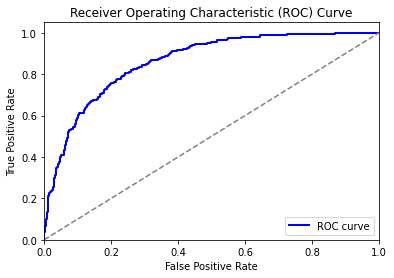

In [31]:

# Assume no missing values for now
# Encode categorical variables
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

# Define feature variables (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression with GridSearch for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
log_reg = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Best Parameters: {log_reg.best_params_}")
print(f"Logistic Regression Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

# Extract coefficients
coefficients = log_reg.best_estimator_.coef_[0]
feature_importance = pd.Series(coefficients, index=X.columns)

# Sort the coefficients by absolute value
sorted_feature_importance = feature_importance.abs().sort_values(ascending=False)

print("\nFeature Importances from Logistic Regression:")
for feature, coef in sorted_feature_importance.items():
    print(f"{feature}: {feature_importance[feature]}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
